Test Accuracy: 100.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1406
           1       1.00      1.00      1.00      1302

   micro avg       1.00      1.00      1.00      2708
   macro avg       1.00      1.00      1.00      2708
weighted avg       1.00      1.00      1.00      2708
 samples avg       1.00      1.00      1.00      2708

test Score: 1.000000000000000 MSE (1.000000000000000 RMSE)
Train Score: 1.000000000000000 MSE (1.000000000000000 RMSE)


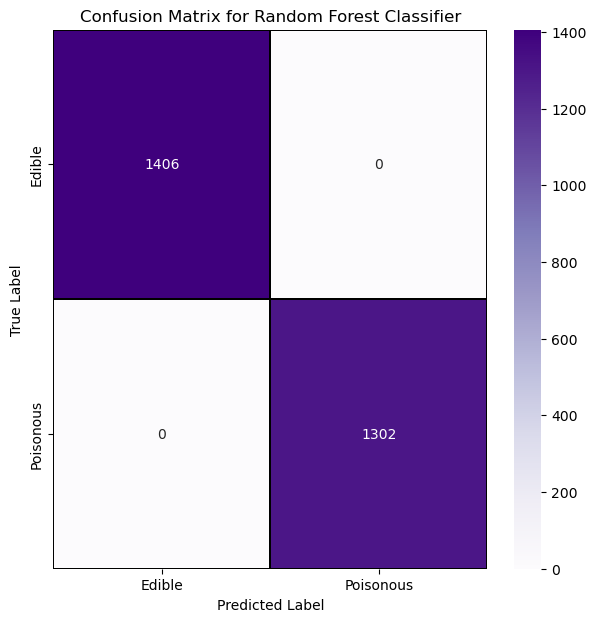

In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pydot
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

#-----------------------------------------import and encoding of data so it can be used in randomForest Model-------------------------------------
#dataset import
colnames=['e/p','cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color','ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'] 
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", names=colnames, header=0)

#oneHOtEncoding
labels = colnames
categorical_data = dataset[labels]
ohe = OneHotEncoder(categories='auto')
feature_arr = ohe.fit_transform(categorical_data).toarray()
ohe_labels = ohe.get_feature_names_out(labels)
features = pd.DataFrame(feature_arr,columns=ohe_labels)
#print(features)

#-------------------------------------------------implementation of random forest AI model------------------------------------------------
#preparing datasets
x= features.iloc[:, -117:].values
Y=features.iloc[:, :-117].values

x_train,x_test, Y_train,Y_test = train_test_split(x, Y, test_size=1/3)


#creating random forest classifier object
param_grid= {
    'n_estimators': np.array(range(70,120)),
    'max_features': ['auto', 'sqrt', 'log2']
}
classifier = RandomForestClassifier(random_state = 42)# scores are better with 100 estimators
# we use grid_search to find the best parameters for classifier
grid_search = GridSearchCV(classifier, param_grid=param_grid, cv=10, scoring='f1_macro', n_jobs=4)
#print(classifier.get_params())#-->best n_estimators is 100

classifier.fit(x_train, Y_train)
y_pred = classifier.predict(x_test)


#---------------------------------test and values of errors of model---------------------------------------------------------------------------------
#we do not use mape because it is problematic for datasets whose scales do not have a meaningful 0 or for intermittent demand datasets, where y_t=0 occurs frequently.
#instead we use MASE: mean  absolut error
#accuracy is usually not measured in regression so we only compute error values

df=pd.DataFrame({'Actual':Y_test.flatten(), 'Predicted':y_pred.flatten()})
#print(df)
# View the classification report for test data and predictions
bsf = classifier.score(x_train, Y_train)
print("Test Accuracy: {}%".format(round(bsf*100, 2)))
print(classification_report(Y_test, y_pred))
testScore = classifier.score(x_test, Y_test)
print('test Score: %.15f MSE (%.15f RMSE)' % (testScore, np.sqrt(testScore)))
trainScore = classifier.score(x_train, Y_train)
print('Train Score: %.15f MSE (%.15f RMSE)' % (trainScore, np.sqrt(trainScore)))


#confusion matrix:
y_pred = (y_pred > 0.5) 
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
x_axis = ["Edible", "Poisonous"]
y_axis = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis, yticklabels=y_axis)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix for Random Forest Classifier');
plt.show()
plt.close()